# Perceptron


## Data Description
We use the breast cancer diagnostic data to test our model.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [1]:
# Import all the necessary libraries
import numpy as np 
import pandas as pd 
import random

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Set the Seaborn theme
sns.set_theme()


#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/AmyrMa/INDE-577/main/data/data.csv")

In [2]:
# data overview for data cleanning process
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data pre-processing 
From observing data, we can remove useless features such as id and NAN column at the end, also we can encoded the diagnosis result as 1 and -1

In [3]:
# as we can see the response values are characters, encoded it as -1 and 1
df['diagnosis'] = np.where(df.diagnosis.values == 'M', -1, 1)
X = df[df.drop(['id','diagnosis', 'Unnamed: 32'], axis = 1).columns].values
y = df['diagnosis']

In [4]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 10000):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [5]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [6]:
model = Perceptron()
model.train(X_train, y_train)
y_pred_test = model.predict(X_test)

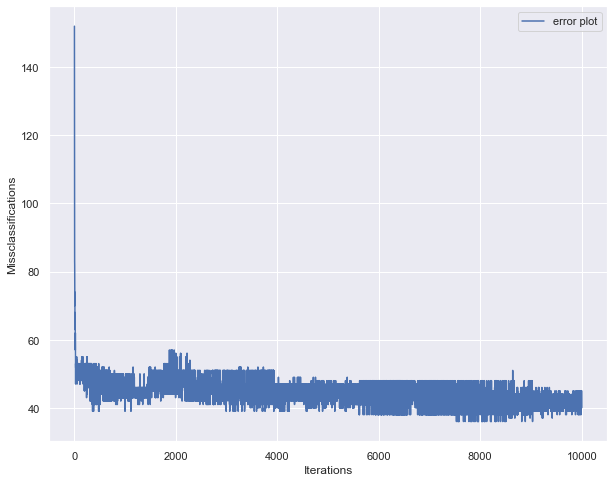

In [7]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(model.errors_)+1), model.errors_,
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

## Model accuracy

In [8]:
print(f'Test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Test accuracy score = 0.9020979020979021


In [9]:
classify_perceptron = classification_report(y_test, y_pred_test)
print("\nClassification Report")
print(classify_perceptron)


Classification Report
              precision    recall  f1-score   support

          -1       0.78      0.96      0.86        45
           1       0.98      0.88      0.92        98

    accuracy                           0.90       143
   macro avg       0.88      0.92      0.89       143
weighted avg       0.92      0.90      0.90       143



# Conclusion
Even though the perceptron is very easy algorithm in machine learning, but for this data set, it has really high test accuracy score. Because the data set is linear regression model. If the data is not linear, then the prediction will have less accruacy.